<a href="https://colab.research.google.com/github/hongrolee/Machine-Learning/blob/main/colab/%EC%A0%9C%ED%92%88_%EB%AC%B4%EA%B2%8C_%EC%98%88%EC%B8%A1_%EB%8B%A4%EC%A4%91_%ED%9A%8C%EA%B7%80_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 제품의 무게 예측해 보기

## 다중 회귀 알고리즘

### 제품의 가로, 두께 생성하기

In [ ]:
import pandas as pd
import numpy as np
import joblib

url='https://drive.google.com/file/d/19RzKaMLzEJ7JsBY0ukaLMiay3K8xp-4S/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

product_total = df.to_numpy()
product_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )
print(product_total)


[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

### 사이킷런을 이용하여 훈련 및 테스트 데이터 생성하기

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_answer, test_answer = train_test_split(product_total, product_weight, random_state=42)


### 사이킷런 변환기를 적용하여 다중 특징 만들기

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(include_bias=False)

poly.fit(train_data)

train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

print(train_poly.shape, test_poly.shape)
print(poly.get_feature_names_out())

(42, 9) (14, 9)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


### 다중 회귀 알고리즘을 적용하여 학습시키기(모델생성 및 평가)

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(train_poly, train_answer)
print('Training Set : ' + str(model.score(train_poly, train_answer)))
print('Test Set     : ' + str(model.score(test_poly, test_answer)))

Training Set : 0.9903183436982125
Test Set     : 0.9714559911594111


### 사이킷런 변환기를 적용하여 다중 특징 만들기(55개)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)

poly.fit(train_data)

train_poly = poly.transform(train_data)
test_poly = poly.transform(test_data)

print(train_poly.shape, test_poly.shape)
print(poly.get_feature_names_out())

(42, 55) (14, 55)
['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2' 'x0^3'
 'x0^2 x1' 'x0^2 x2' 'x0 x1^2' 'x0 x1 x2' 'x0 x2^2' 'x1^3' 'x1^2 x2'
 'x1 x2^2' 'x2^3' 'x0^4' 'x0^3 x1' 'x0^3 x2' 'x0^2 x1^2' 'x0^2 x1 x2'
 'x0^2 x2^2' 'x0 x1^3' 'x0 x1^2 x2' 'x0 x1 x2^2' 'x0 x2^3' 'x1^4'
 'x1^3 x2' 'x1^2 x2^2' 'x1 x2^3' 'x2^4' 'x0^5' 'x0^4 x1' 'x0^4 x2'
 'x0^3 x1^2' 'x0^3 x1 x2' 'x0^3 x2^2' 'x0^2 x1^3' 'x0^2 x1^2 x2'
 'x0^2 x1 x2^2' 'x0^2 x2^3' 'x0 x1^4' 'x0 x1^3 x2' 'x0 x1^2 x2^2'
 'x0 x1 x2^3' 'x0 x2^4' 'x1^5' 'x1^4 x2' 'x1^3 x2^2' 'x1^2 x2^3' 'x1 x2^4'
 'x2^5']


### Training Set와 Test Set의 모델 평가 다시 해보기

In [ ]:
model.fit(train_poly, train_answer)
print('Training Set : ' + str(model.score(train_poly, train_answer)))
print('Test Set     : ' + str(model.score(test_poly, test_answer)))

Training Set : 0.9999999999996433
Test Set     : -144.40579436844948


### 규제하기

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀 알고리즘

### 적용하기

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_answer)
print(ridge.score(train_scaled, train_answer))
print(ridge.score(test_scaled, test_answer))

0.9896101671037343
0.9790693977615387


### 최적의 알파값 찾기

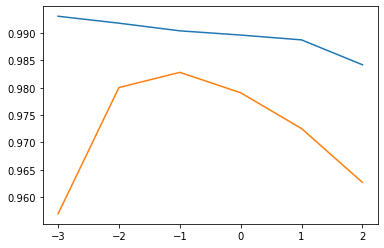

In [ ]:
import matplotlib.pyplot as plt

train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 릿지 모델을 만듭니다
    ridge = Ridge(alpha=alpha)
    # 릿지 모델을 훈련합니다
    ridge.fit(train_scaled, train_answer)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(ridge.score(train_scaled, train_answer))
    test_score.append(ridge.score(test_scaled, test_answer))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

### 최적의 알파값 적용하여 다시 모델 평가하기

In [ ]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_answer)

print(ridge.score(train_scaled, train_answer))
print(ridge.score(test_scaled, test_answer))

0.9903815817570367
0.9827976465386928


## 라쏘 회귀 알고리즘

### 적용하기

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_answer)
print(lasso.score(train_scaled, train_answer))
print(lasso.score(test_scaled, test_answer))

0.989789897208096
0.9800593698421883


### 최적의 알파값 찾기

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.878e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.297e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(


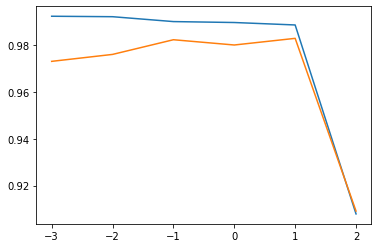

In [ ]:
train_score = []
test_score = []

alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    # 라쏘 모델을 만듭니다
    lasso = Lasso(alpha=alpha, max_iter=10000)
    # 라쏘 모델을 훈련합니다
    lasso.fit(train_scaled, train_answer)
    # 훈련 점수와 테스트 점수를 저장합니다
    train_score.append(lasso.score(train_scaled, train_answer))
    test_score.append(lasso.score(test_scaled, test_answer))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

### 최적의 알파값을 적용하여 다시 모델 평가하기

In [ ]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_answer)

print(lasso.score(train_scaled, train_answer))
print(lasso.score(test_scaled, test_answer))

0.9888067471131867
0.9824470598706695
